<a href="https://colab.research.google.com/github/NAKSHATRA3010/RESEARCH-PAPER/blob/main/Flight_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install scikit-learn scipy matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Pd0tJXmq6x5ZQMpa0MrUZJddy5qEpc67' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Pd0tJXmq6x5ZQMpa0MrUZJddy5qEpc67" -O flights.csv && rm -rf /tmp/cookies.txt

--2022-06-26 10:52:00--  https://docs.google.com/uc?export=download&confirm=t&id=1Pd0tJXmq6x5ZQMpa0MrUZJddy5qEpc67
Resolving docs.google.com (docs.google.com)... 74.125.142.138, 74.125.142.113, 74.125.142.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k587ffb8om9uj83q3oaqd9qcj6r7s25h/1656240675000/11277515690122224349/*/1Pd0tJXmq6x5ZQMpa0MrUZJddy5qEpc67?e=download [following]
--2022-06-26 10:52:00--  https://doc-0s-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k587ffb8om9uj83q3oaqd9qcj6r7s25h/1656240675000/11277515690122224349/*/1Pd0tJXmq6x5ZQMpa0MrUZJddy5qEpc67?e=download
Resolving doc-0s-3g-docs.googleusercontent.com (doc-0s-3g-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0s-3g-docs.googleusercontent.com (doc-0s-3g

In [14]:
df =pd.read_csv("flights.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAXI_OUT','TAXI_IN','TAIL_NUMBER','ORIGIN_AIRPORT','CANCELLED','DIVERTED','DESTINATION_AIRPORT','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1 ,inplace=True)

In [18]:
df.head()

,AIRLINE,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,AS,98,5,2354.0,-11.0,15.0,205.0,194.0,169.0,1448,404.0,430,408.0,-22.0
1,AA,2336,10,2.0,-8.0,14.0,280.0,279.0,263.0,2330,737.0,750,741.0,-9.0
2,US,840,20,18.0,-2.0,34.0,286.0,293.0,266.0,2296,800.0,806,811.0,5.0
3,AA,258,20,15.0,-5.0,30.0,285.0,281.0,258.0,2342,748.0,805,756.0,-9.0
4,AS,135,25,24.0,-1.0,35.0,235.0,215.0,199.0,1448,254.0,320,259.0,-21.0


In [19]:
df

,AIRLINE,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,AS,98,5,2354.0,-11.0,15.0,205.0,194.0,169.0,1448,404.0,430,408.0,-22.0
1,AA,2336,10,2.0,-8.0,14.0,280.0,279.0,263.0,2330,737.0,750,741.0,-9.0
2,US,840,20,18.0,-2.0,34.0,286.0,293.0,266.0,2296,800.0,806,811.0,5.0
3,AA,258,20,15.0,-5.0,30.0,285.0,281.0,258.0,2342,748.0,805,756.0,-9.0
4,AS,135,25,24.0,-1.0,35.0,235.0,215.0,199.0,1448,254.0,320,259.0,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,B6,688,2359,2355.0,-4.0,17.0,320.0,298.0,272.0,2611,749.0,819,753.0,-26.0
5819075,B6,745,2359,2355.0,-4.0,12.0,227.0,215.0,195.0,1617,427.0,446,430.0,-16.0
5819076,B6,1503,2359,2350.0,-9.0,7.0,221.0,222.0,197.0,1598,424.0,440,432.0,-8.0
5819077,B6,333,2359,2353.0,-6.0,3.0,161.0,157.0,144.0,1189,327.0,340,330.0,-10.0


In [20]:
df.drop(['WHEELS_ON','WHEELS_OFF'],axis=1,inplace =True)

In [21]:
df.head()

,AIRLINE,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,AS,98,5,2354.0,-11.0,205.0,194.0,169.0,1448,430,408.0,-22.0
1,AA,2336,10,2.0,-8.0,280.0,279.0,263.0,2330,750,741.0,-9.0
2,US,840,20,18.0,-2.0,286.0,293.0,266.0,2296,806,811.0,5.0
3,AA,258,20,15.0,-5.0,285.0,281.0,258.0,2342,805,756.0,-9.0
4,AS,135,25,24.0,-1.0,235.0,215.0,199.0,1448,320,259.0,-21.0


In [22]:
df

,AIRLINE,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,AS,98,5,2354.0,-11.0,205.0,194.0,169.0,1448,430,408.0,-22.0
1,AA,2336,10,2.0,-8.0,280.0,279.0,263.0,2330,750,741.0,-9.0
2,US,840,20,18.0,-2.0,286.0,293.0,266.0,2296,806,811.0,5.0
3,AA,258,20,15.0,-5.0,285.0,281.0,258.0,2342,805,756.0,-9.0
4,AS,135,25,24.0,-1.0,235.0,215.0,199.0,1448,320,259.0,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,B6,688,2359,2355.0,-4.0,320.0,298.0,272.0,2611,819,753.0,-26.0
5819075,B6,745,2359,2355.0,-4.0,227.0,215.0,195.0,1617,446,430.0,-16.0
5819076,B6,1503,2359,2350.0,-9.0,221.0,222.0,197.0,1598,440,432.0,-8.0
5819077,B6,333,2359,2353.0,-6.0,161.0,157.0,144.0,1189,340,330.0,-10.0


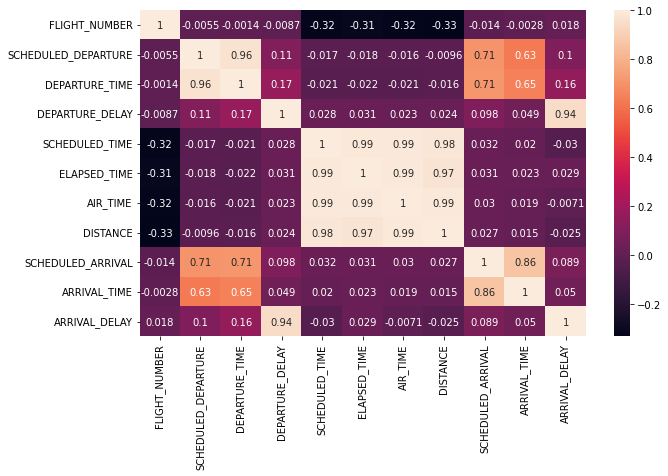

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

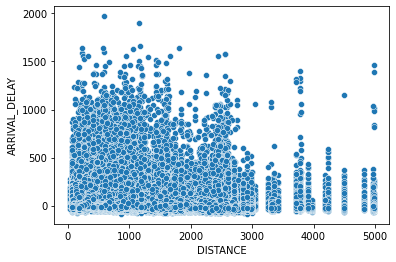

In [24]:
sns.scatterplot(x='DISTANCE',y='ARRIVAL_DELAY',data=df)

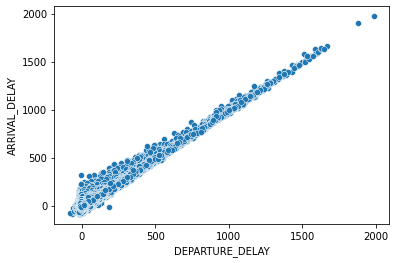

In [25]:
sns.scatterplot(x='DEPARTURE_DELAY',y='ARRIVAL_DELAY',data=df)

In [26]:
df.groupby('AIRLINE').mean()['ARRIVAL_DELAY']

AIRLINE
AA     3.451372
AS    -0.976563
B6     6.677861
DL     0.186754
EV     6.585379
F9    12.504706
HA     2.023093
MQ     6.457873
NK    14.471800
OO     5.845652
UA     5.431594
US     3.706209
VX     4.737706
WN     4.374964
Name: ARRIVAL_DELAY, dtype: float64

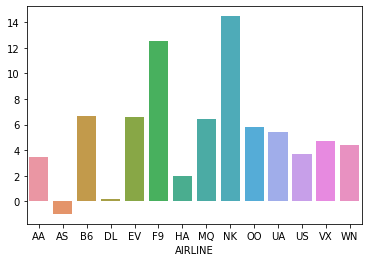

In [27]:
sns.barplot(x=df.groupby('AIRLINE').mean()['ARRIVAL_DELAY'].index, y=df.groupby('AIRLINE').mean()['ARRIVAL_DELAY'].values)

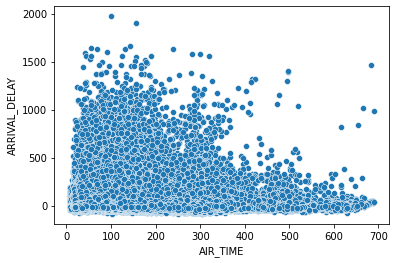

In [28]:
sns.scatterplot(x='AIR_TIME',y='ARRIVAL_DELAY',data=df)

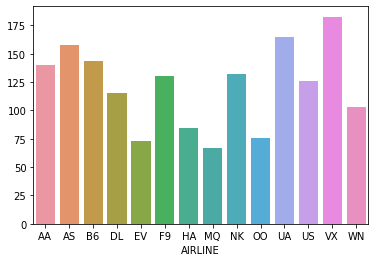

In [29]:
sns.barplot(x=df.groupby('AIRLINE').mean()['AIR_TIME'].index, y=df.groupby('AIRLINE').mean()['AIR_TIME'].values)

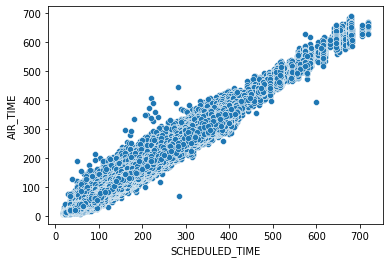

In [30]:
sns.scatterplot(x='SCHEDULED_TIME',y='AIR_TIME',data=df)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
df.AIRLINE.value_counts()

WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
Name: AIRLINE, dtype: int64

In [33]:
df.columns

Index(['AIRLINE', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],
      dtype='object')

In [34]:
#df['AIRLINE']=df['AIRLINE'].astype(int)

In [35]:
X =df[['FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']]

In [36]:
Y =df['ARRIVAL_DELAY']

In [37]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=101)

In [38]:
lm = LinearRegression()

In [39]:
df = df.dropna()

In [40]:
df.drop('AIRLINE',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
df.head()

,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,98,5,2354.0,-11.0,205.0,194.0,169.0,1448,430,408.0,-22.0
1,2336,10,2.0,-8.0,280.0,279.0,263.0,2330,750,741.0,-9.0
2,840,20,18.0,-2.0,286.0,293.0,266.0,2296,806,811.0,5.0
3,258,20,15.0,-5.0,285.0,281.0,258.0,2342,805,756.0,-9.0
4,135,25,24.0,-1.0,235.0,215.0,199.0,1448,320,259.0,-21.0


In [42]:
lm.fit(X_train,Y_train)

ValueError: ignored

In [ ]:
predictions =lm.predict(X_test)

In [ ]:
# Result
lm.score(X_test,Y_test)

In [ ]:
# Result
lm.score(X_train,Y_train)

In [ ]:
# Result
sns.scatterplot(Y_test,predictions)

In [ ]:
df

In [ ]:
predictions

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(Y_test, predictions)

In [ ]:
metrics.mean_squared_error(Y_test, predictions)

In [ ]:
np.sqrt(metrics.mean_squared_error(Y_test, predictions))